In [1]:
letters = ['a','b','c','d','e','f','g','h','i','j']
data_path_1 = ['data/e2' + l + 't.csv' for l in letters]
data_path_1

['data/e2at.csv',
 'data/e2bt.csv',
 'data/e2ct.csv',
 'data/e2dt.csv',
 'data/e2et.csv',
 'data/e2ft.csv',
 'data/e2gt.csv',
 'data/e2ht.csv',
 'data/e2it.csv',
 'data/e2jt.csv']

In [2]:
import neural_network as nn
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Using TensorFlow backend.
W0717 12:14:12.497574 140480543311488 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


Populating the interactive namespace from numpy and matplotlib


In [3]:
dfs = [nn.load_nl_data({'data_path':path}) for path in data_path_1]

In [4]:
dfs = [df[df['time'] >= 489] for df in dfs]

In [5]:
dfs = [df.drop(columns=['old_pos', 'electors_state', 'votes_state', 'next_move', 'previous_votes', 'seats', 'previous_seats']) for df in dfs]

In [6]:
dfs = [pd.concat([df, pd.DataFrame(df['pos'].values.tolist(), columns = ['pos_x', 'pos_y'], index=df.index)], axis = 1) for df in dfs]

In [7]:
for i in range(len(letters)):
    dfs[i]['run'] = i

In [8]:
df = pd.concat(dfs)

In [9]:
df.describe()

,time,agent,votes,pos_x,pos_y,run
count,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000
mean,494.000000,1000.0,275.565455,-0.512186,2.059417,4.500000
std,3.163716,0.0,54.532360,3.353606,5.363492,2.873588
min,489.000000,1000.0,79.000000,-8.996769,-10.449944,0.000000
25%,491.000000,1000.0,239.000000,-2.279855,-1.437725,2.000000
50%,494.000000,1000.0,291.500000,-0.314231,2.007872,4.500000
75%,497.000000,1000.0,318.000000,1.740830,5.898661,7.000000
max,499.000000,1000.0,364.000000,6.401090,10.436269,9.000000


In [10]:
df[df['time'] == 499].describe()

,time,agent,votes,pos_x,pos_y,run
count,100.0,100.0,100.000000,100.000000,100.000000,100.000000
mean,499.0,1000.0,275.450000,-0.505368,2.050326,4.500000
std,0.0,0.0,53.655349,3.366976,5.381595,2.886751
min,499.0,1000.0,96.000000,-8.496769,-10.449944,0.000000
25%,499.0,1000.0,239.250000,-2.279855,-1.437725,2.000000
50%,499.0,1000.0,290.000000,-0.268499,2.007872,4.500000
75%,499.0,1000.0,316.250000,1.740830,5.898661,7.000000
max,499.0,1000.0,349.000000,6.401090,10.436269,9.000000


In [11]:
df = df[df['time'] == 499]

In [12]:
df = df.drop(columns=['time','pos', 'agent'])

In [13]:
df['abs_x'] = abs(df['pos_x'])
df['abs_y'] = abs(df['pos_y'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3ee8dd208>],
      dtype=object)

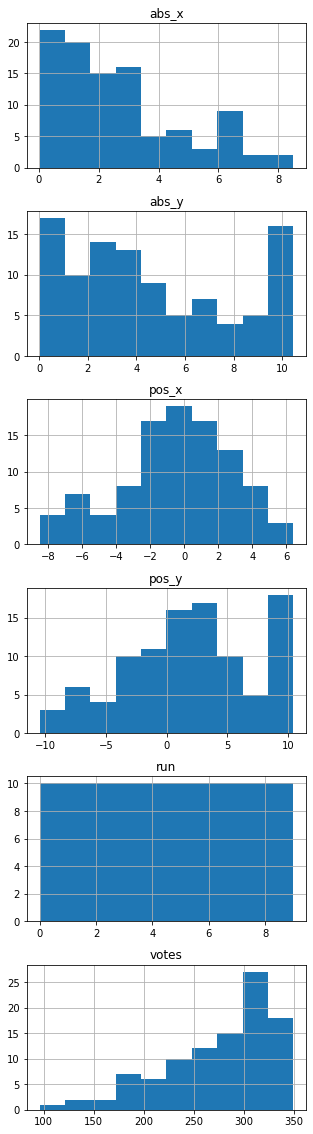

In [14]:
df.hist(layout=(6,1), figsize=(5,20))

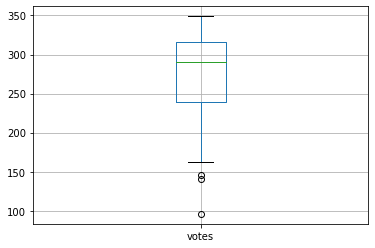

In [15]:
df.boxplot(column=['votes'], whis=1)

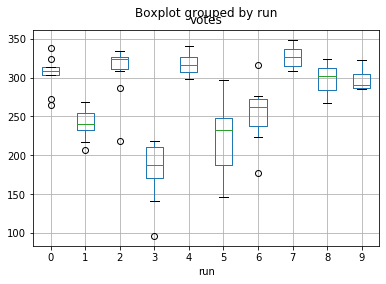

In [16]:
df.boxplot(column=['votes'], whis=1, by='run')

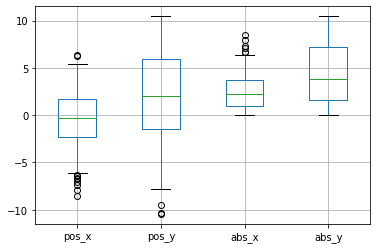

In [17]:
df.boxplot(column=['pos_x','pos_y', 'abs_x','abs_y'], whis=1)

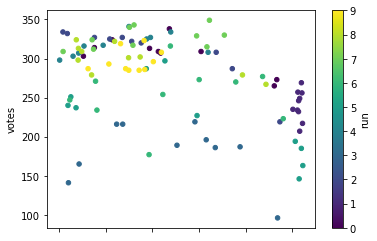

In [18]:
df.plot.scatter(x='abs_y', y='votes', c='run', colormap='viridis')

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
linreg = ols('votes ~ C(run)', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     27.64
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           2.70e-22
Time:                        12:14:52   Log-Likelihood:                -473.37
No. Observations:                 100   AIC:                             966.7
Df Residuals:                      90   BIC:                             992.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     305.5000      9.172     33.307      0.000     287.278     323.722
C(run)[T.1]   -65.3000     12.971     -5.034      0.000     -91.070     -39.530
C(run)[T.2]     4.6000     12.971      0.355      0.724     -21.170      30.370
C(run)[T.3]  -124.4000     12.971     -9.590      0.000    -150.170     -98.630
C(run)[T.4]    12.1000     12.971      0.933      0.353     -13.670      37.870
C(run)[T.5]   -82.8000     12.971     -6.383      0.000    -108.570     -57.030
C(run)[T.6]   -51.3000     12.971     -3.955      0.000     -77.070     -25.530
C(run)[T.7]    21.3000     12.971      1.642      0.104      -4.470      47.070
C(run)[T.8]    -6.1000     12.971     -0.470      0.639     -31.870      19.670
C(run)[T.9]    -8.6000     12.971     -0.663      0.509     -34.370      17.170
==============================================================================
Omnibus:                       17.640   Durbin-Watson:                   2.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.012
Skew:                          -0.769   Prob(JB):                     8.27e-07
Kurtosis:                       5.088   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
aov_table = sm.stats.anova_lm(linreg)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(run),9.0,209293.85,23254.872222,27.64163,2.704062e-22
Residual,90.0,75716.90,841.298889,NaN,NaN


In [22]:
linreg = ols('abs_x ~ C(run)', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  abs_x   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     50.57
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           2.11e-31
Time:                        12:14:53   Log-Likelihood:                -125.31
No. Observations:                 100   AIC:                             270.6
Df Residuals:                      90   BIC:                             296.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.5051      0.282      5.330      0.000       0.944       2.066
C(run)[T.1]    -0.2552      0.399     -0.639      0.524      -1.049       0.538
C(run)[T.2]    -0.1821      0.399     -0.456      0.649      -0.976       0.611
C(run)[T.3]     5.3177      0.399     13.316      0.000       4.524       6.111
C(run)[T.4]    -0.7005      0.399     -1.754      0.083      -1.494       0.093
C(run)[T.5]     3.3957      0.399      8.503      0.000       2.602       4.189
C(run)[T.6]     2.6043      0.399      6.521      0.000       1.811       3.398
C(run)[T.7]    -0.6300      0.399     -1.577      0.118      -1.423       0.163
C(run)[T.8]     0.8462      0.399      2.119      0.037       0.053       1.640
C(run)[T.9]     1.2575      0.399      3.149      0.002       0.464       2.051
==============================================================================
Omnibus:                       10.927   Durbin-Watson:                   2.349
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.027
Skew:                           0.647   Prob(JB):                      0.00245
Kurtosis:                       4.102   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
aov_table = sm.stats.anova_lm(linreg)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(run),9.0,362.931628,40.325736,50.571676,2.111529e-31
Residual,90.0,71.765790,0.797398,NaN,NaN


In [24]:
linreg = ols('pos_x ~ C(run)', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pos_x   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     129.4
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           1.55e-47
Time:                        12:14:53   Log-Likelihood:                -131.05
No. Observations:                 100   AIC:                             282.1
Df Residuals:                      90   BIC:                             308.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5051      0.299     -5.033      0.000      -2.099      -0.911
C(run)[T.1]     2.7332      0.423      6.462      0.000       1.893       3.573
C(run)[T.2]     2.8226      0.423      6.673      0.000       1.982       3.663
C(run)[T.3]    -5.3177      0.423    -12.573      0.000      -6.158      -4.477
C(run)[T.4]     0.7700      0.423      1.820      0.072      -0.070       1.610
C(run)[T.5]     6.4060      0.423     15.146      0.000       5.566       7.246
C(run)[T.6]    -2.6043      0.423     -6.157      0.000      -3.445      -1.764
C(run)[T.7]     1.7663      0.423      4.176      0.000       0.926       2.607
C(run)[T.8]    -0.8462      0.423     -2.001      0.048      -1.686      -0.006
C(run)[T.9]     4.2678      0.423     10.090      0.000       3.428       5.108
==============================================================================
Omnibus:                        2.541   Durbin-Watson:                   2.452
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.315
Skew:                          -0.029   Prob(JB):                        0.314
Kurtosis:                       3.743   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
aov_table = sm.stats.anova_lm(linreg)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(run),9.0,1041.812973,115.756997,129.412775,1.549689e-47
Residual,90.0,80.503102,0.894479,NaN,NaN


In [26]:
mlr = linreg = ols('votes ~ C(run) + pos_x + pos_y', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     22.79
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           2.95e-21
Time:                        12:14:54   Log-Likelihood:                -472.27
No. Observations:                 100   AIC:                             968.5
Df Residuals:                      88   BIC:                             999.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     299.1694     10.492     28.514      0.000     278.319     320.020
C(run)[T.1]   -61.7106     16.565     -3.725      0.000     -94.630     -28.791
C(run)[T.2]    18.0453     16.461      1.096      0.276     -14.667      50.757
C(run)[T.3]  -141.9386     21.543     -6.589      0.000    -184.750     -99.127
C(run)[T.4]    14.0468     13.222      1.062      0.291     -12.228      40.322
C(run)[T.5]   -60.0760     24.529     -2.449      0.016    -108.823     -11.329
C(run)[T.6]   -61.1253     15.534     -3.935      0.000     -91.996     -30.255
C(run)[T.7]    28.3398     14.240      1.990      0.050       0.040      56.639
C(run)[T.8]   -10.1195     13.323     -0.760      0.450     -36.597      16.358
C(run)[T.9]     5.4922     18.943      0.290      0.773     -32.153      43.138
pos_x          -3.5180      3.247     -1.084      0.282      -9.971       2.934
pos_y           0.6864      0.695      0.987      0.326      -0.695       2.068
==============================================================================
Omnibus:                       18.776   Durbin-Watson:                   2.507
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.426
Skew:                          -0.826   Prob(JB):                     4.08e-07
Kurtosis:                       5.082   Cond. No.                         77.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
mlr = linreg = ols('votes ~ C(run) + abs_x + abs_y', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     47.09
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           4.20e-32
Time:                        12:14:54   Log-Likelihood:                -443.17
No. Observations:                 100   AIC:                             910.3
Df Residuals:                      88   BIC:                             941.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     349.8774      8.657     40.415      0.000     332.673     367.082
C(run)[T.1]   -48.2744     10.804     -4.468      0.000     -69.745     -26.804
C(run)[T.2]    -2.2556      9.740     -0.232      0.817     -21.611      17.100
C(run)[T.3]   -30.4525     16.737     -1.819      0.072     -63.714       2.809
C(run)[T.4]    -8.0645      9.988     -0.807      0.422     -27.914      11.785
C(run)[T.5]   -19.0272     13.027     -1.461      0.148     -44.915       6.861
C(run)[T.6]    -4.6910     11.773     -0.398      0.691     -28.087      18.705
C(run)[T.7]     6.9595      9.850      0.707      0.482     -12.615      26.534
C(run)[T.8]     2.5255     10.052      0.251      0.802     -17.450      22.501
C(run)[T.9]     7.5462     10.332      0.730      0.467     -12.986      28.078
abs_x         -17.6120      2.566     -6.864      0.000     -22.711     -12.513
abs_y          -3.8286      0.831     -4.607      0.000      -5.480      -2.177
==============================================================================
Omnibus:                        1.134   Durbin-Watson:                   2.432
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                1.106
Skew:                          -0.119   Prob(JB):                        0.575
Kurtosis:                       2.543   Cond. No.                         73.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
df['abs_y_t'] = abs (df['abs_y'] - 3.8)

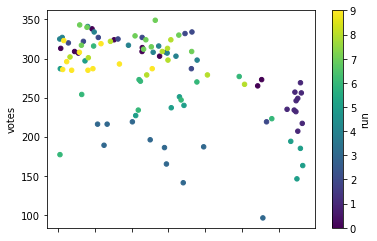

In [29]:
df.plot.scatter(x='abs_y_t', y='votes', c='run', colormap='viridis')

In [30]:
mlr = linreg = ols('votes ~ C(run) + abs_x + abs_y_t', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     72.56
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           2.89e-39
Time:                        12:14:55   Log-Likelihood:                -424.17
No. Observations:                 100   AIC:                             872.3
Df Residuals:                      88   BIC:                             903.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     353.5258      6.933     50.995      0.000     339.749     367.303
C(run)[T.1]   -24.7813      9.650     -2.568      0.012     -43.958      -5.605
C(run)[T.2]     5.1570      8.043      0.641      0.523     -10.826      21.140
C(run)[T.3]   -29.6424     13.827     -2.144      0.035     -57.121      -2.164
C(run)[T.4]    -2.4705      8.158     -0.303      0.763     -18.683      13.743
C(run)[T.5]    -8.0742     10.866     -0.743      0.459     -29.667      13.519
C(run)[T.6]    -3.0133      9.732     -0.310      0.758     -22.354      16.327
C(run)[T.7]     9.7634      8.130      1.201      0.233      -6.394      25.920
C(run)[T.8]    12.4534      8.225      1.514      0.134      -3.892      28.799
C(run)[T.9]    -1.1767      8.652     -0.136      0.892     -18.371      16.018
abs_x         -16.8148      2.125     -7.912      0.000     -21.039     -12.591
abs_y_t       -10.4079      1.229     -8.470      0.000     -12.850      -7.966
==============================================================================
Omnibus:                        3.093   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.671
Skew:                          -0.397   Prob(JB):                        0.263
Kurtosis:                       3.102   Cond. No.                         52.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
mlr = linreg = ols('votes ~ abs_x + abs_y', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           2.31e-33
Time:                        12:14:56   Log-Likelihood:                -462.18
No. Observations:                 100   AIC:                             930.4
Df Residuals:                      97   BIC:                             938.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    358.0966      5.244     68.290      0.000     347.689     368.504
abs_x        -19.7435      1.200    -16.459      0.000     -22.124     -17.363
abs_y         -6.4282      0.747     -8.605      0.000      -7.911      -4.946
==============================================================================
Omnibus:                        0.830   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.854
Skew:                          -0.039   Prob(JB):                        0.652
Kurtosis:                       2.554   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
data_path_random_1 = ['data/e2' + l + 'r.csv' for l in letters]

In [33]:
dfsr = [nn.load_nl_data({'data_path':path}) for path in data_path_random_1]
dfsr = pd.concat(dfsr)
dfsr = pd.concat([dfsr, pd.DataFrame(dfsr['pos'].values.tolist(), columns = ['pos_x', 'pos_y'], index=dfsr.index)], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3eeee2240>],
      dtype=object)

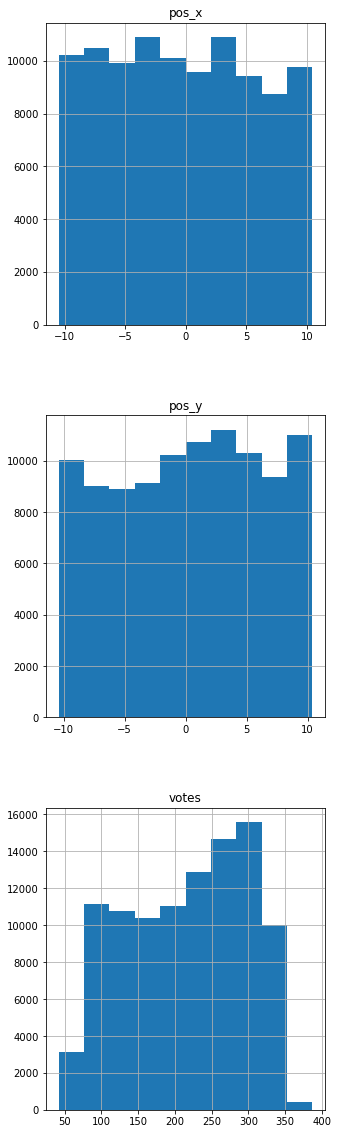

In [34]:
dfsr.hist(column=['votes', 'pos_x', 'pos_y'], layout=(3,1), figsize=(5,20))

<Figure size 432x288 with 0 Axes>

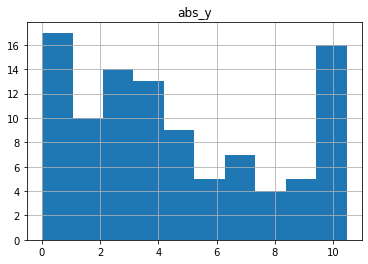

In [35]:
figure, axes = plt.subplots()
df.hist(column=['votes'],figsize=(5,5), ax=axes)
figure.savefig('plot/ex2votes.pdf')
figure.clear()
figure, axes = plt.subplots()
df.hist(column=['abs_y'],figsize=(5,5), ax=axes)
figure.savefig('plot/ex2absy.pdf')